
# Universidad de Buenos Aires
# Deep Learning - TP
# Cohorte 17 - 5to bimestre 2024


El TP comienza al momento de recibir este correo y la ventana de entrega estará abierta hasta **las 20hs del Lunes 02 de diciembre**. La resolución es individual. Pueden utilizar los contenidos vistos en clase y otra bibliografía. Si se toman ideas de fuentes externas deben ser correctamente citadas incluyendo el correspondiente link o página de libro.

El formato de entrega debe ser un “link a un colab” (permitir acceso a las siguientes direcciones: alfonsorafel93@gmail.com y lelectronfou@gmail.com) y **se realizará en el siguiente link de google form: [link](https://docs.google.com/forms/d/e/1FAIpQLScnAC5wu1fIOqDKGrbdV8MZfU6AlJ6B7tBNNpL3qRAEGaudzg/viewform?usp=sf_link)**. Tanto los resultados, como el código y las explicaciones deben quedar guardados y visualizables en el colab.

NO ES NECESARIO QUE NOS ENVIEN COREEO AVISANDO DE LA ENTREGA!

**Consideraciones a tener en cuenta:**
- Se entregará 1 solo colab para la totalidad del examen.
- Renombrar el archivo de la siguiente manera: **APELLIDO-NOMBRE-DL-TP Co(numero de cohorte).ipynb**
- Los códigos deben poder ejecutarse.
- Los resultados, cómo el código y las explicaciones deben quedar guardados y visualizables en el correspondiente link.
- Prestar atención a las consignas, responder las preguntas cuando corresponda.


**Condiciones de aprobación**
- Se aprueba con más del 60% del examen bien resuelto de cada parte del TP (Parte 1 y Parte 2).
- La escala de notas empleada por la UBA es aprobado para nota igual o superior a 4.

## Librerias

In [1]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np

import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay,balanced_accuracy_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

import torch
import torch.optim as optim
import torch.nn as nn
from torch.nn import CrossEntropyLoss
from torch.utils.data import DataLoader, TensorDataset, Dataset
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

import time
import optuna
from functools import partial

In [3]:
if torch.cuda.is_available():
       print("GPU is available")
       device = torch.device("cuda")  # Set device to GPU
else:
       print("GPU is not available, using CPU instead")
       device = torch.device("cpu")  # Set device to CPU

GPU is not available, using CPU instead


# Parte 1
Descargar el dataset del siguiente link: https://drive.google.com/file/d/1X8_G5BpQMi-Nnbtms2RL8lcWSxzD8ixd/view?usp=sharing. El dataset son compras de productos que diferentes clientes realizaron durante un black sales. El dataset contiene información sobre las transacciones y el objetivo es poder utilizarlo para crear diferentes modelos que puedan predecir cuánto un cliente está dispuesto a gastar en un producto en el futuro.
- a) Praparacion del dataset: procesar las variables, explicar los criterios utilizados y analizar las distribuciones.

Particularmente para los puntos b), c) y d) vamos a tratar este problema como una clasificación donde queremos averiguar si el cliente pertenece al grupo 0 (gasta menos de 5000), al grupo 1 (gasta entre 5000 y 10000), al grupo 2 (gasta entre 10000 y 15000) o al grupo 3 (gasta más de 15000).
- b) Definir uno o varios puntos de comparacion (benchmark) para comparar los modelos. Pueden usarse modelos de ML clasico de facil entrenamiento.
- c) Entrenar un modelo de deep learning que no utilice embeddings, **descartando el `product_id` y `user_id`.** . Graficar las evoluciones de la funcion de costo y la metrica de validacion. Explicar el proceso de iteracion utilizado para conseguir los resultados y justificar los resultados obtenidos.
- d)	Entrenar un modelo de deep learning que utilice **2 capas de embeddings**, una para los productos y otra para los usuarios. Graficar las evoluciones de la funcion de costo y la metrica de validacion. Explicar el proceso de iteracion utilizado para conseguir los resultados y justificar los resultados obtenidos. Comparar contra el modelo sin embeddings.
Recordar que tanto para el punto c) como el d) pueden usarse herramientas como regularizacion y prueba de hiperpametros para conseguir mejores resultados.
- e) Para el modelo del punto c) implementar una funcion que a reciba un id de usuario y sugiera **n** cantidad usuarios que tuvieron un comportamiento de compras similar.
- f) Para el mejor modelo obtenido en el apartado d) elegir al menos 2 hiperparametros para tunear. Explicar el metodo utilizado y los resultados obtenidos. Recordar de explicar los criterios de eleccion de los hiperpametros, no elegirlos al azar.



## Punto a)

In [ ]:
# Ruta al archivo CSV
file_path = 'https://raw.githubusercontent.com/AzulVillanueva/CEIA-AP/refs/heads/main/dataset_black_sales.csv'
data = pd.read_csv(file_path)

data.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
# Variables categóricas
data['Gender'].value_counts(), data['Age'].value_counts(), data['City_Category'].value_counts(), data['Stay_In_Current_City_Years'].value_counts()

(Gender
 M    414259
 F    135809
 Name: count, dtype: int64,
 Age
 26-35    219587
 36-45    110013
 18-25     99660
 46-50     45701
 51-55     38501
 55+       21504
 0-17      15102
 Name: count, dtype: int64,
 City_Category
 B    231173
 C    171175
 A    147720
 Name: count, dtype: int64,
 Stay_In_Current_City_Years
 1     193821
 2     101838
 3      95285
 4+     84726
 0      74398
 Name: count, dtype: int64)

El dataset tiene 550,068 filas y 12 columnas:

1. **User_ID**: Identificador único del usuario (tipo int).
2. **Product_ID**: Identificador único del producto (tipo object).
3. **Gender**: Género del usuario (F o M).
4. **Age**: Grupo etario del usuario ( 0-17, 18-25,55+,etc).
5. **Occupation**: Ocupación del usuario (número entero que probablemente represente categorías).
6. **City_Category**: Ciudad categorizada ( A, B, C).
7. **Stay_In_Current_City_Years**: Años que el usuario lleva viviendo en la ciudad (valores como 2, 4+).
8. **Marital_Status**: Estado civil (0: soltero, 1: casado).
9. **Product_Category_1**: Categoría del producto (entero).
10. **Product_Category_2**: Categoría adicional del producto (float).
11. **Product_Category_3**: Categoría adicional del producto (float).
12. **Purchase**: Monto gastado en la compra (variable target, tipo int).

In [ ]:
# Análisis de valores faltantes
nan_percentage = data.isnull().mean() * 100
print(nan_percentage)

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64


In [ ]:
# Convertir columnas categóricas a numéricas usando One-Hot Encoding
data = pd.get_dummies(data, columns=['City_Category'],drop_first=True)
#data.columns

#True=1, False=0
data.City_Category_B=data.City_Category_B.astype(int)
data.City_Category_C=data.City_Category_C.astype(int)

In [ ]:
# 'Gender' a binario (F: 0, M: 1)
data['Gender'] = data['Gender'].map({'F': 0, 'M': 1})

# 'Age' a etiquetas numéricas ordinales
age_mapping = {'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6}
data['Age'] = data['Age'].map(age_mapping)

# 'Stay_In_Current_City_Years' a numérico (reemplazando '4+' por 4)
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].replace('4+', 4).astype(int)

In [ ]:
#Imputacion de variable Product_Category_2 por regresión

train_data = data[data['Product_Category_2'].notnull()]
test_data = data[data['Product_Category_2'].isnull()]

X_train = train_data.drop(['Product_Category_3','Product_Category_2','Product_ID'], axis=1)
X_test = test_data.drop(['Product_Category_3','Product_Category_2','Product_ID'], axis=1)

y_train = train_data['Product_Category_2']

# Modelo de regresión lineal
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Reemplazar los valores nulos con las predicciones
data.loc[data['Product_Category_2'].isnull(), 'Product_Category_2'] = y_pred

In [ ]:
#Imputacion de variable Product_Category_3 por regresión

train_data = data[data['Product_Category_3'].notnull()]
test_data = data[data['Product_Category_3'].isnull()]

X_train = train_data.drop(['Product_Category_3','Product_ID'], axis=1)
X_test = test_data.drop(['Product_Category_3','Product_ID'], axis=1)

y_train = train_data['Product_Category_3']

# Modelo de regresión lineal
model = LinearRegression()

model.fit(X_train, y_train)

y_pred= model.predict(X_test)

# Reemplazar los valores nulos con las predicciones
data.loc[data['Product_Category_3'].isnull(), 'Product_Category_3'] = y_pred

In [ ]:
# Verifico si hay valores faltantes
nan_percentage = data.isnull().mean() * 100
print(nan_percentage)


User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Product_Category_3            0.0
Purchase                      0.0
City_Category_B               0.0
City_Category_C               0.0
dtype: float64


In [ ]:
# Crear variable de clasificación basada en 'Purchase'
def classify_purchase(purchase):
    if purchase < 5000:
        return 0
    elif 5000 <= purchase < 10000:
        return 1
    elif 10000 <= purchase < 15000:
        return 2
    else:
        return 3

data['Purchase_Class'] = data['Purchase'].apply(classify_purchase)

# Inspección de datos procesados
data['Purchase_Class'].value_counts()

,count
Purchase_Class,
1,265606
3,110523
0,94923
2,79016


In [ ]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C,Purchase_Class
0,1000001,P00069042,0,0,10,2,0,3,8.416781,12.871967,8370,0,0,1
1,1000001,P00248942,0,0,10,2,0,1,6.000000,14.000000,15200,0,0,3
2,1000001,P00087842,0,0,10,2,0,12,15.922421,16.017993,1422,0,0,0
3,1000001,P00085442,0,0,10,2,0,12,14.000000,15.004729,1057,0,0,0
4,1000002,P00285442,1,6,16,4,0,8,13.369905,16.001411,7969,0,1,1


Resumen del preprocesamiento realizado:

1. **Valores faltantes**:
   - Para *Product_Category_2* y *Product_Category_3* se realizó imputación por regresión.

2. **Codificaciones**:
   - *Gender* se convirtió a binario: F = 0, M = 1.
   - *Age* se convirtió a valores ordinales basados en los rangos de edad.
   - *City_Category* se codificó con One Hot Encoding generandose las nuevas variables *City_Category_B* y *City_Category_C*
   - *Stay_In_Current_City_Years* se convirtió a números enteros, con 4+ transformado en 4.

3. **Variable de clasificación**
   Se generó la nueva variable *Purchase_Class* como resultado de agrupar los clientes en clases basadas en su gasto:
     - Grupo 0: Menos de 5000.
     - Grupo 1: Entre 5000 y 10000.
     - Grupo 2: Entre 10000 y 15000.
     - Grupo 3: Más de 15000.

Text(0, 0.5, 'Cantidad')

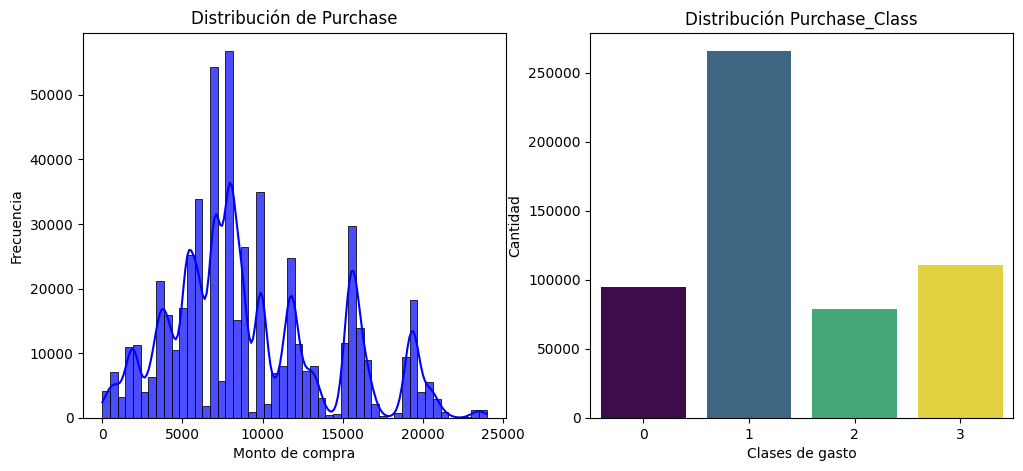

In [ ]:
# Configuración general para gráficos

plt.figure(figsize=(12, 5))

# Histograma de la variable objetivo 'Purchase' y su clasificación
plt.subplot(1, 2, 1)
sns.histplot(data['Purchase'], bins=50, kde=True, color='blue', alpha=0.7)
plt.title('Distribución de Purchase')
plt.xlabel('Monto de compra')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.countplot(x='Purchase_Class', data=data, hue='Purchase_Class',legend=False, palette='viridis')
plt.title('Distribución Purchase_Class')
plt.xlabel('Clases de gasto')
plt.ylabel('Cantidad')





1. **Distribución de Purchase**:
   - La mayoría de los montos de compra están en el rango de 5000 a 15000.
   - Hay una cola larga hacia la derecha, indicando que unos pocos usuarios gastan significativamente más.

2. **Distribución de las clases (Purchase_Class)**:

    - Grupo 0 (<5000): 94,923 ejemplos.
    - Grupo 1 (5000-10000): 265,606 ejemplos.
    - Grupo 2 (10000-15000): 79,016 ejemplos.
    - Grupo 3 (>15000): 110,523 ejemplos.

   La clase 1 (5000-10000) es la más común.
   Las clases 0, 2 y 3 tienen menos ejemplos, especialmente la clase 2 (10000-15000).

 En el contexto de un problema de clasificacion se observa que las clases están desbalanceadas.  

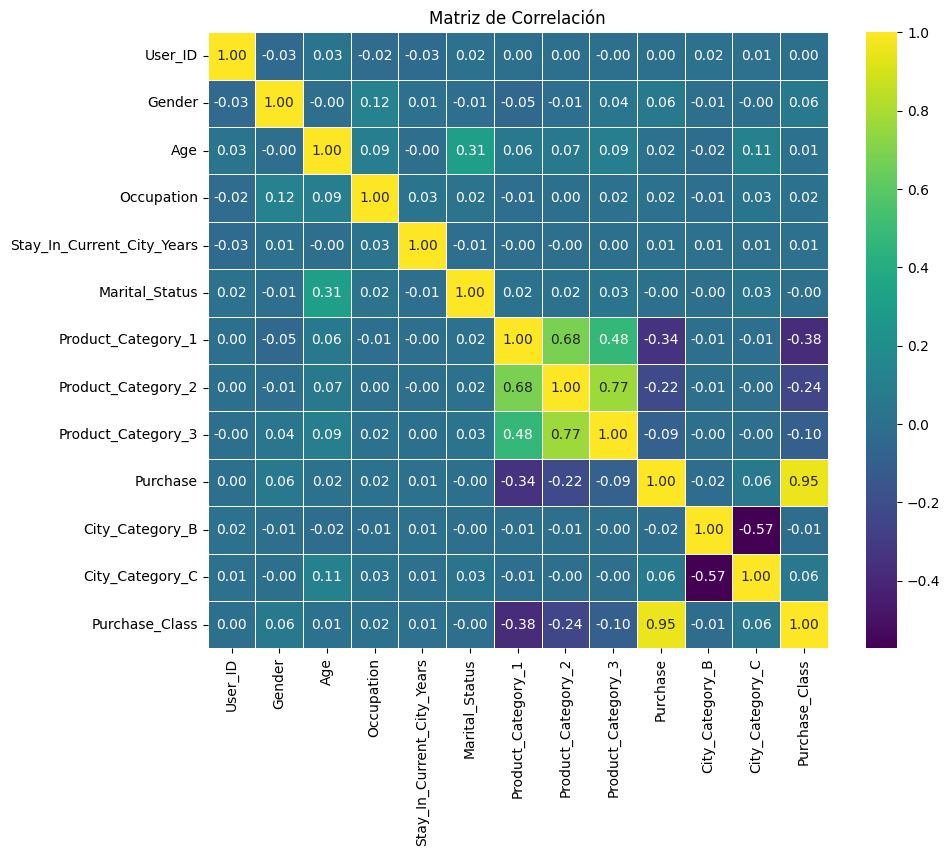

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.drop('Product_ID', axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap='viridis',fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Del análisis de correlacion lineal entre features se observa:

- Asociacion lineal positiva moderada entre las categorías de producto.
- Asociacion lineal negativa moderada entre las categorías de ciudades.
- Asociacion lineal negativa leve entre el monto de las compras y las categorías de producto (lo mismo sucede con la variable Purchase_Class)

Text(0, 0.5, 'Product_Category_3')

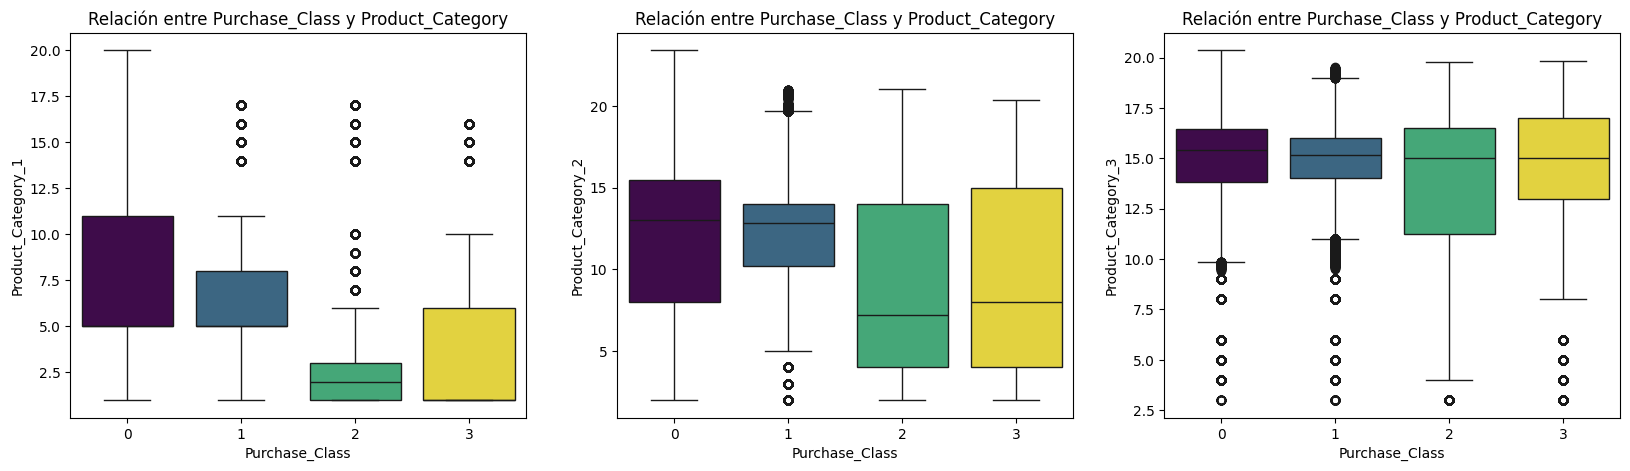

In [ ]:
plt.figure(figsize=(20, 5))

# Relación entre 'Purchase_Class' y 'Product_Category_1'
plt.subplot(1, 3, 1)
sns.boxplot(y='Product_Category_1', x='Purchase_Class', data=data, hue='Purchase_Class',legend=False,palette='viridis')
plt.title('Relación entre Purchase_Class y Product_Category')
plt.xlabel('Purchase_Class')
plt.ylabel('Product_Category_1')

# Relación entre 'Purchase_Class' y 'Product_Category_2'
plt.subplot(1, 3, 2)
sns.boxplot(y='Product_Category_2', x='Purchase_Class', data=data, hue='Purchase_Class',legend=False, palette='viridis')
plt.title('Relación entre Purchase_Class y Product_Category')
plt.xlabel('Purchase_Class')
plt.ylabel('Product_Category_2')

# Relación entre 'Purchase_Class' y 'Product_Category_3'
plt.subplot(1, 3, 3)
sns.boxplot(y='Product_Category_3', x='Purchase_Class', data=data, hue='Purchase_Class',legend=False, palette='viridis')
plt.title('Relación entre Purchase_Class y Product_Category')
plt.xlabel('Purchase_Class')
plt.ylabel('Product_Category_3')

## Punto b)

In [ ]:
# Division del dataset

# Seleccionar las columnas relevantes
X = data.drop(columns=['User_ID', 'Product_ID','Purchase_Class','Purchase'])
# Definir variable objetivo
y = data['Purchase_Class']

In [ ]:
# Dividir en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

# Normalizar características
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba
X_val_scaled = scaler.transform(X_val)

Se entrenarán tres modelos: Regresión Logística, Árboles de Desición y Random Forest. En los tres casos los hiperarámetros están seteados en default excepto la máxima profundidad del arbol de descición la cual se fijó en 10.

In [ ]:
# Benchmark 1: Regresión Logística
log_reg = LogisticRegression(random_state=42,class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_val_scaled)

# Benchmark 2: Árbol de Decisión
tree_clf = DecisionTreeClassifier(max_depth=10, random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_val)

# Benchmark 3: Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_val)


=== Regresión Logística ===
              precision    recall  f1-score   support

           0       0.29      0.50      0.37     28477
           1       0.77      0.43      0.55     79682
           2       0.29      0.38      0.33     23705
           3       0.38      0.48      0.43     33157

    accuracy                           0.44    165021
   macro avg       0.43      0.44      0.42    165021
weighted avg       0.54      0.44      0.46    165021



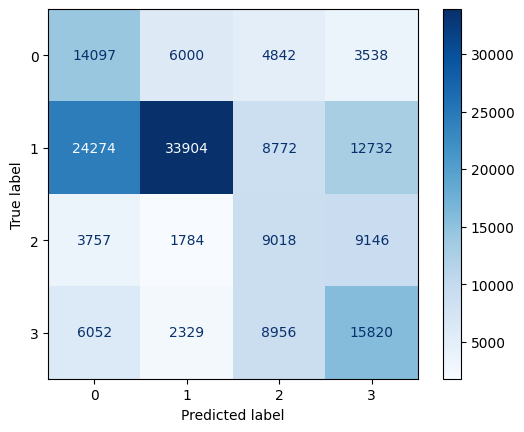

In [ ]:
#Metricas Regresion Logistica
print("=== Regresión Logística ===")
print(classification_report(y_val, y_pred_log))

ConfusionMatrixDisplay.from_predictions(y_val, y_pred_log,cmap='Blues')
plt.show()


=== Arbol de Decisión ===
              precision    recall  f1-score   support

           0       0.86      0.63      0.73     28477
           1       0.86      0.86      0.86     79682
           2       0.61      0.42      0.50     23705
           3       0.64      0.93      0.76     33157

    accuracy                           0.77    165021
   macro avg       0.74      0.71      0.71    165021
weighted avg       0.78      0.77      0.77    165021



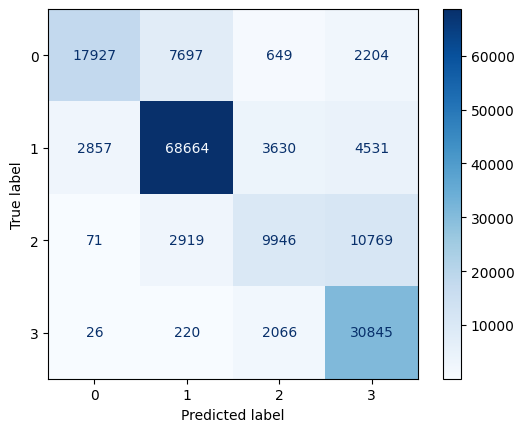

In [ ]:
#Metricas Arbol de Decision
print("=== Arbol de Decisión ===")
print(classification_report(y_val, y_pred_tree))

ConfusionMatrixDisplay.from_predictions(y_val, y_pred_tree,cmap='Blues')
plt.show()

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.94      0.85      0.89     28477
           1       0.91      0.92      0.92     79682
           2       0.65      0.60      0.63     23705
           3       0.75      0.85      0.80     33157

    accuracy                           0.85    165021
   macro avg       0.81      0.80      0.81    165021
weighted avg       0.85      0.85      0.85    165021



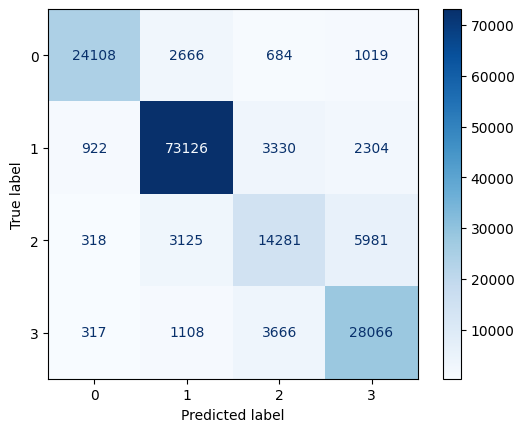

In [ ]:
#Metricas Random Forest
print("=== Random Forest ===")
print(classification_report(y_val, y_pred_rf))

ConfusionMatrixDisplay.from_predictions(y_val, y_pred_rf,cmap='Blues')
plt.show()

In [ ]:
#Balanced Accuracy
print("=== Regresión Logística ===")
print('Balanced Accuracy:',round(balanced_accuracy_score(y_val, y_pred_log),2))

print("\n=== Árbol de Decisión ===")
print('Balanced Accuracy:',round(balanced_accuracy_score(y_val, y_pred_tree),2))

print("\n=== Random Forest ===")
print('Balanced Accuracy:',round(balanced_accuracy_score(y_val, y_pred_rf),2))

=== Regresión Logística ===
Balanced Accuracy: 0.44

=== Árbol de Decisión ===
Balanced Accuracy: 0.71

=== Random Forest ===
Balanced Accuracy: 0.8


Para la comparación de los modelos se considerará la métrica balanced accuracy dado el desbalance de clases. Se observa que la regresión logística tiene un desempeño muy bajo.

##Punto c)

In [ ]:
# División del dataset

# Seleccionar las columnas relevantes
X = data.drop(columns=['User_ID', 'Product_ID', 'Purchase_Class', 'Purchase'])
y = data['Purchase_Class']

# Dividir en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Normalizar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Convertir los datos a tensores de PyTorch
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

model_se: Modelo sin Embeddings.

Se define un modelo base, simple y poco profundo con tres capas lineales y activaciones ReLU. Se aplica dropout para regularización.

In [ ]:
# Definimos el modelo
class SimpleNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, output_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

In [ ]:
# Parámetros del modelo
input_dim = X_train.shape[1]  # Dimensión de entrada (número de características)
output_dim = len(y.unique())  # Dimensión de salida (número de clases)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Crear la instancia del modelo utilizando las dimensiones parametrizadas
model_se = SimpleNN(input_dim=input_dim, output_dim=output_dim)
model_se.to(device)

# Función de pérdida y optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_se.parameters(), lr=0.001)


Se entrenará el modelo (con la arquitectura definida anteriormente) durante 200 epochs usando un batch size de tamaño 64. Se utiliza cross-entropy como funcion de pérdida y Adam como optimizador.

In [ ]:
# Entrenamiento del modelo
n_epochs = 200
train_losses_se = []
val_losses_se = []
train_balanced_accuracies_se = []
val_balanced_accuracies_se = []

for epoch in range(n_epochs):
    model_se.train()
    running_loss = 0.0
    y_train_true = []
    y_train_pred = []

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model_se(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        y_train_true.extend(labels.cpu().numpy())
        y_train_pred.extend(predicted.cpu().numpy())

    train_loss = running_loss / len(train_loader)
    train_balanced_acc = balanced_accuracy_score(y_train_true, y_train_pred)
    train_losses_se.append(train_loss)
    train_balanced_accuracies_se.append(train_balanced_acc)

    # Validación
    model_se.eval()
    val_loss = 0.0
    y_val_true = []
    y_val_pred = []

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            y_val_true.extend(labels.cpu().numpy())
            y_val_pred.extend(predicted.cpu().numpy())

    val_loss /= len(val_loader)
    val_balanced_acc = balanced_accuracy_score(y_val_true, y_val_pred)
    val_losses_se.append(val_loss)
    val_balanced_accuracies_se.append(val_balanced_acc)

    print(f"Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Train Balanced Acc: {train_balanced_acc:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Balanced Acc: {val_balanced_acc:.4f}")


Epoch 1/200, Train Loss: 0.9772, Train Balanced Acc: 0.4813, Val Loss: 0.8385, Val Balanced Acc: 0.5672
Epoch 2/200, Train Loss: 0.7937, Train Balanced Acc: 0.5943, Val Loss: 0.6382, Val Balanced Acc: 0.6733
Epoch 3/200, Train Loss: 0.6585, Train Balanced Acc: 0.6724, Val Loss: 0.5502, Val Balanced Acc: 0.7324
Epoch 4/200, Train Loss: 0.6100, Train Balanced Acc: 0.6946, Val Loss: 0.5154, Val Balanced Acc: 0.7355
Epoch 5/200, Train Loss: 0.5873, Train Balanced Acc: 0.7096, Val Loss: 0.4889, Val Balanced Acc: 0.7405
Epoch 6/200, Train Loss: 0.5748, Train Balanced Acc: 0.7158, Val Loss: 0.4792, Val Balanced Acc: 0.7534
Epoch 7/200, Train Loss: 0.5665, Train Balanced Acc: 0.7231, Val Loss: 0.4663, Val Balanced Acc: 0.7555
Epoch 8/200, Train Loss: 0.5535, Train Balanced Acc: 0.7310, Val Loss: 0.4504, Val Balanced Acc: 0.7820
Epoch 9/200, Train Loss: 0.5445, Train Balanced Acc: 0.7363, Val Loss: 0.4475, Val Balanced Acc: 0.7855
Epoch 10/200, Train Loss: 0.5339, Train Balanced Acc: 0.7440, Va

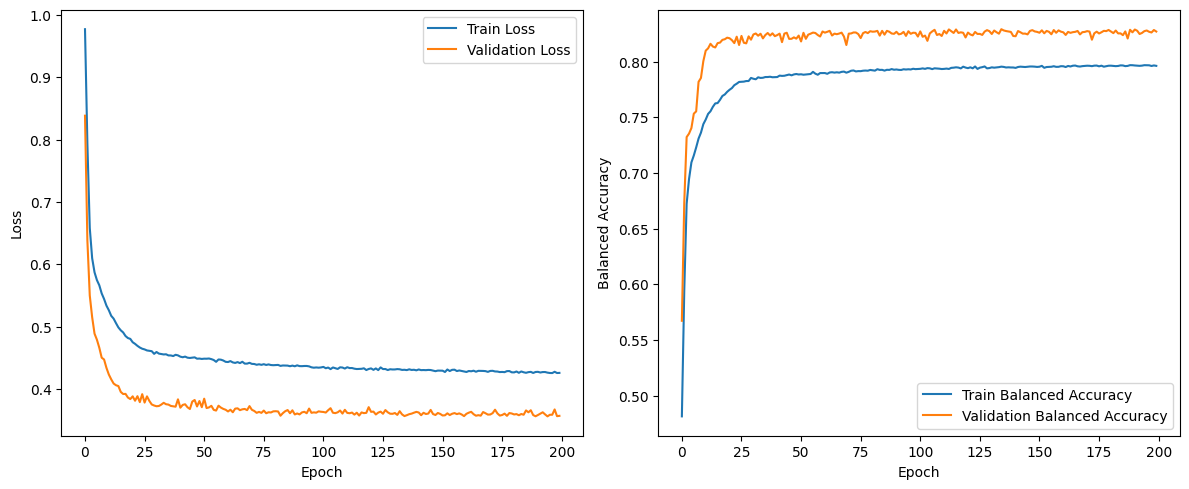

In [ ]:
# Graficar pérdidas y balanced accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses_se, label='Train Loss')
plt.plot(val_losses_se, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_balanced_accuracies_se, label='Train Balanced Accuracy')
plt.plot(val_balanced_accuracies_se, label='Validation Balanced Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Balanced Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Del análisis de las curvas se observa que, tanto en entrenamiento como en validación, la **pérdida (loss)** se reduce significativamente al inicio de las epochs. Esto evidencia que el modelo se encuentra en una etapa de aprendizaje. No obstante la pérdida de entrenamiento baja continuamente a lo largo de las épocas mientras que la pérdida de validación parecería estabilizarse.

Respecto de la métrica de evaluacion (balanced accuracy) se observa que la misma aumenta tanto en entrenamiento como en validacion y luego se mantiene practicamente constante en torno a valores del orden 0.8. En comparacion con los modelos del punto b, las metricas obtenidas en este caso se encuentran dentro de lo esperado aunque podrían ser mejores.

En conclusión el modelo generaliza bien sobre nuevos datos, no hay evidencia clara de overfitting y no hay necesidad evidente de seguir entrenandolo más allá de las primeras 40-50 epochs.

## Punto d)

In [ ]:
#Preparacion de datos para embeddings: Usesr_ID y Product_ID

user_encoder = LabelEncoder()
product_encoder = LabelEncoder()

data_emb=data.copy()
data_emb['User_ID'] = user_encoder.fit_transform(data_emb['User_ID'])
data_emb['Product_ID'] = product_encoder.fit_transform(data_emb['Product_ID'])

user_id = data_emb['User_ID']
product_id = data_emb['Product_ID']

X = data_emb.drop(columns=[ 'Purchase_Class','Purchase'])
y = data_emb['Purchase_Class']

In [ ]:
data_emb.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C,Purchase_Class
0,0,672,0,0,10,2,0,3,8.416781,12.871967,8370,0,0,1
1,0,2376,0,0,10,2,0,1,6.000000,14.000000,15200,0,0,3
2,0,852,0,0,10,2,0,12,15.922421,16.017993,1422,0,0,0
3,0,828,0,0,10,2,0,12,14.000000,15.004729,1057,0,0,0
4,1,2734,1,6,16,4,0,8,13.369905,16.001411,7969,0,1,1


In [ ]:
# Dividir los datos en conjunto de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

#Tensores
train_user_ids=torch.tensor(X_train['User_ID'].values, dtype=torch.long)
train_product_ids=torch.tensor(X_train['Product_ID'].values, dtype=torch.long)
train_targets=torch.tensor(y_train.values, dtype=torch.long)

val_user_ids=torch.tensor(X_val['User_ID'].values, dtype=torch.long)
val_product_ids=torch.tensor(X_val['Product_ID'].values, dtype=torch.long)
val_targets=torch.tensor(y_val.values, dtype=torch.long)

# Normalizar características

X_train=X_train.drop(columns=['User_ID', 'Product_ID'])
X_val=X_val.drop(columns=['User_ID', 'Product_ID'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

train_features = torch.tensor(X_train_scaled, dtype=torch.float32)
val_features = torch.tensor(X_val_scaled, dtype=torch.float32)

In [ ]:
#Clase dataset custom
class Dataset(Dataset):
    def __init__(self, user_ids, product_ids, features, targets):
        self.user_ids = user_ids
        self.product_ids = product_ids
        self.features = features
        self.targets = targets

    def __len__(self):
        return len(self.targets)

    def __getitem__(self, idx):
        return (self.user_ids[idx].to(device),
                self.product_ids[idx].to(device),
                self.features[idx].to(device),
                self.targets[idx].to(device))

# Datasets para entrenamiento y validación
train_dataset = Dataset(train_user_ids, train_product_ids, train_features, train_targets)
val_dataset = Dataset(val_user_ids, val_product_ids, val_features, val_targets)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [ ]:
#Parametros del modelo
n_users = data_emb['User_ID'].nunique()
n_products = data_emb['Product_ID'].nunique()
n_classes = 4

embedding_dim_users = int(math.sqrt(n_users))
embedding_dim_products = int(math.sqrt(n_products))
input_dim = train_features.shape[1]

print(f'Número de usuarios: {n_users}, Dimensión sugerida de embedding de usuarios: {embedding_dim_users}')
print(f'Número de productos: {n_products}, Dimensión sugerida de embedding de productos: {embedding_dim_products}')
print(f'Número de características: {input_dim}')

Número de usuarios: 5891, Dimensión sugerida de embedding de usuarios: 76
Número de productos: 3631, Dimensión sugerida de embedding de productos: 60
Número de características: 10


In [ ]:
# Seteo por default para optimizar rendimiento.
embedding_dim_users=40
embedding_dim_products=40

model_ce: Modelo con Embeddings.

Se define un modelo profundo con dos capas de embeddings, 5 capas lineales y activaciones ReLU. Se aplica dropout para regularización.

In [ ]:
# Modelo con embeddings
class EmbeddingModel(nn.Module):
    def __init__(self, n_users, n_products, embedding_dim_products, embedding_dim_users, n_classes, input_dim):
        super(EmbeddingModel, self).__init__()

        # Capas de embeddings para usuarios y productos
        self.user_embedding = nn.Embedding(n_users, embedding_dim_users)
        self.product_embedding = nn.Embedding(n_products, embedding_dim_products)

        # Capas densas
        self.fc1 = nn.Linear(embedding_dim_users + embedding_dim_products + input_dim, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, n_classes)

        # Funcion de activacion
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, user_id, product_id, features):

        # Embeddings de usuario y producto
        user_emb = self.user_embedding(user_id)
        product_emb = self.product_embedding(product_id)

        # Concatenar embeddings con características
        x = torch.cat([user_emb, product_emb, features], dim=1)

        # Capas densas
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)

        return x

In [ ]:
def train_model(model, train_loader, val_loader, optimizer, criterion, epochs):

    # Entrenamiento y validación del modelo
    train_loss = []
    val_loss = []
    train_accuracy = []
    val_accuracy = []

    for epoch in range(epochs):
        model.train()
        epoch_train_loss = 0

        y_train_true = []
        y_train_pred = []

        # Entrenamiento
        for user_ids, product_ids, features, targets in train_loader:
            optimizer.zero_grad()

            # Forward
            outputs = model(user_ids, product_ids, features)
            loss = criterion(outputs, targets)

            # Backward
            loss.backward()
            optimizer.step()

            # Loss
            epoch_train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)

            # Guardar las etiquetas verdaderas y las predicciones
            y_train_true.extend(targets.cpu().numpy())
            y_train_pred.extend(predicted.cpu().numpy())

        # Calcular balanced accuracy para el conjunto de entrenamiento
        train_balanced_acc = balanced_accuracy_score(y_train_true, y_train_pred)

        # Guardar los resultados por época
        train_loss.append(epoch_train_loss / len(train_loader))
        train_accuracy.append(train_balanced_acc)

        # Validacion
        model.eval()
        epoch_val_loss = 0
        y_val_true = []
        y_val_pred = []

        with torch.no_grad():
            for user_ids, product_ids, features, targets in val_loader:
                val_outputs = model(user_ids, product_ids, features)
                val_loss_value = criterion(val_outputs, targets)
                epoch_val_loss += val_loss_value.item()

                _, predicted_val_classes = torch.max(val_outputs, 1)

                # Guardar las etiquetas verdaderas y las predicciones para la validación
                y_val_true.extend(targets.cpu().numpy())
                y_val_pred.extend(predicted_val_classes.cpu().numpy())

        # Calcular balanced accuracy para el conjunto de validación
        val_balanced_acc = balanced_accuracy_score(y_val_true, y_val_pred)

        # Guardar los resultados por época
        val_loss.append(epoch_val_loss / len(val_loader))
        val_accuracy.append(val_balanced_acc)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss[-1]}, Val Loss: {val_loss[-1]}, Train Accuracy: {train_accuracy[-1]}, Val Accuracy: {val_accuracy[-1]}")

    return train_loss, val_loss, train_accuracy, val_accuracy

El modelo se entrenará durante 200 epochs utilizando un batch size de tamaño 64, cross-entropy como funcion de pérdida y Adam como optimizador.

In [ ]:
# Entrenamiento y validación del modelo
train_loss_ce=[]
val_loss_ce=[]
train_accuracy_ce=[]
val_accuracy_ce=[]

model_ce = EmbeddingModel(n_users, n_products, embedding_dim_products,embedding_dim_users, n_classes, input_dim)
model_ce.to(device)

#Optimizador Adam y funcion de perdida
optimizer = optim.Adam(model_ce.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

train_loss_ce, val_loss_ce, train_accuracy_ce, val_accuracy_ce=train_model(model_ce, train_loader, val_loader, optimizer, criterion, epochs=200)

Epoch 1/200, Train Loss: 1.058473621459623, Val Loss: 0.8974960747732124, Train Accuracy: 0.40590274421896244, Val Accuracy: 0.5165245854903491
Epoch 2/200, Train Loss: 0.8875909647672937, Val Loss: 0.8102121411390478, Train Accuracy: 0.5212714928859318, Val Accuracy: 0.5631014291941857
Epoch 3/200, Train Loss: 0.8139734302661497, Val Loss: 0.7559449658138708, Train Accuracy: 0.5633818141109685, Val Accuracy: 0.5948757206481923
Epoch 4/200, Train Loss: 0.7654552780969686, Val Loss: 0.7217361175792076, Train Accuracy: 0.5903308632063564, Val Accuracy: 0.6136186719174588
Epoch 5/200, Train Loss: 0.7329816440272335, Val Loss: 0.6994216821715091, Train Accuracy: 0.6081392317794996, Val Accuracy: 0.6266206460158076
Epoch 6/200, Train Loss: 0.7099669041507998, Val Loss: 0.6833769594943537, Train Accuracy: 0.6200776310391278, Val Accuracy: 0.6373872698995142
Epoch 7/200, Train Loss: 0.6938071627790833, Val Loss: 0.6713195202793434, Train Accuracy: 0.6286049893304082, Val Accuracy: 0.637845022

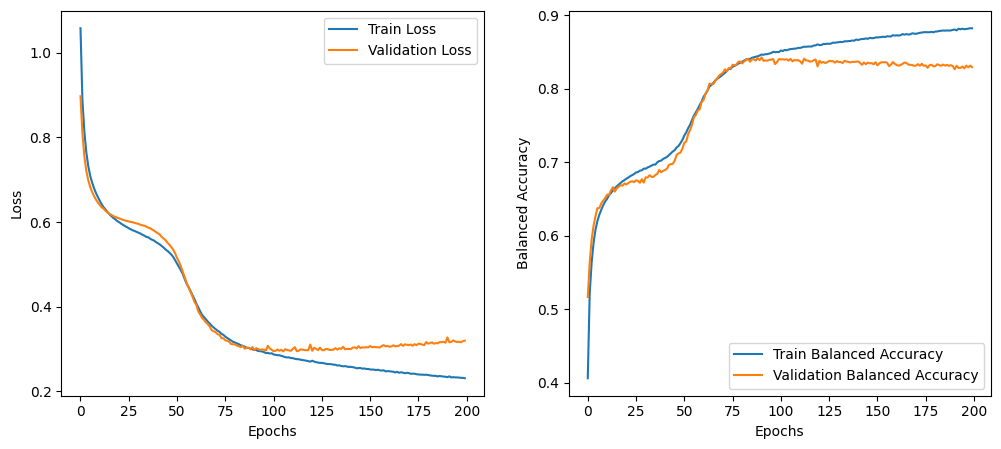

In [ ]:
# Plot the loss and accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_ce, label='Train Loss')
plt.plot(val_loss_ce, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy_ce, label='Train Balanced Accuracy')
plt.plot(val_accuracy_ce, label='Validation Balanced Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Balanced Accuracy')
plt.legend()

plt.show()


En ambos gráficos se puede observar que el modelo tiende al overfitting.
A partir de la epoca 75 la métrica balanced accuracy aumenta en entrenamiento y deja de hacerlo en validación. A su vez se observa que la pérdida disminuye en entrenamiento mientras que en validacion hay una leve tendencia a aumentar. En ambos gráficos se puede ver como comienza a aumentar la distancia entre las curvas.

Se podrían optimizar hiperparametros como el tamaño de las capas de embeddings o la tasa de aprendizaje para detener el overfitting. También se podría implementar early stopping para detener el entrenamiento de la red.


## Punto e)

In [ ]:
def list_similar_users(model, user_id, n=5, user_encoder=None):
    """
    Función para sugerir n usuarios con comportamiento de compras similar.

    Args:
    - model: Modelo con embeddings entrenado con pytorch.
    - user_id: ID del usuario para el cual se desea encontrar usuarios similares.
    - n: Numero de usuarios similares a sugerir.
    - user_encoder: Codificador que mapea los user_id al indice numerico correspondiente.

    Returns:
    - lista de n usuarios más similares
    """

    # Asegurarse de que el modelo esté en modo de evaluación
    model.eval()  # Pone el modelo en modo evaluación

    # Convertir el user_id al índice correspondiente
    user_idx = user_encoder.transform([user_id])[0]

    # Extraer el embedding del usuario solicitado
    user_input = torch.tensor([user_idx]).long()
    product_input = torch.zeros_like(user_input)
    numeric_input = torch.zeros((1, model.fc1.in_features - 2))

    with torch.no_grad():  # No calcular gradientes
        user_embedding = model.user_embedding(user_input).cpu().numpy()

    # Obtener los embeddings de todos los usuarios
    all_user_embeddings = []
    for i in range(len(user_encoder.classes_)):
        user_input = torch.tensor([i]).long()
        product_input = torch.zeros_like(user_input)
        numeric_input = torch.zeros((1, model.fc1.in_features - 2))

        with torch.no_grad():
            user_emb = model.user_embedding(user_input).cpu().numpy()
            all_user_embeddings.append(user_emb)

    all_user_embeddings = np.vstack(all_user_embeddings)

    # Calcular similitudes (usamos similitud del coseno)
    similarities = cosine_similarity(user_embedding, all_user_embeddings).flatten()

    # Ordenar las similitudes y obtener los n usuarios más similares (sin incluir el usuario mismo)
    similar_users_idx = np.argsort(similarities)[::-1][1:n+1]

    # Recuperar los IDs de los usuarios más similares
    similar_users = user_encoder.inverse_transform(similar_users_idx)

    return similar_users



Para medir la similaridad se utiliza la similitud coseno. Dado un User_ID se encodea para obtener su representación numérica (LabelEncoder) y tomando los embeddings como input se utiliza el modelo entrenado previamente.

In [ ]:
#Lista de usuarios similares a User_ID=1006039

user_id =1006039
n = 8

similar_users = list_similar_users(model_ce, user_id, n, user_encoder=user_encoder)

print(f"Usuarios similares a {user_id}: {similar_users}")

Usuarios similares a 1006039: [1002432 1000178 1002842 1005538 1001568 1001044 1001626 1004871]


## Punto f)

Se optimizarán los siguientes hiperparámetros:

- learning_rate: tasa de aprendizaje para el optimizador. Este hiperparámetro permite controlar la velocidad de actualización de los pesos durante el entrenamiento.Es decir, determina qué tan grande es el paso que da el modelo al actualizar los pesos durante el proceso de optimización. Elegir un valor adecuado para la tasa de aprendizaje tiene un impacto directo en la convergencia del modelo y su capacidad para encontrar el mínimo global de la función de pérdida.
El objetivo es evitar problemas como el sobreajuste o el estancamiento en mínimos locales y mejorar la velocidad de convergencia.

- Dimension de las cpas de embeddings (embedding_dim_users y embedding_dim_products): Determina el tamaño del vector en cada capa de embeddings. controlan la cantidad de información que se puede capturar en las representaciones vectoriales que el modelo aprende. Estos vectores sirven para representar entidades discretas (usuarios, productos, etc.) en un espacio continuo, lo que permite que el modelo entienda las relaciones y patrones subyacentes entre estas entidades.
El objetivo es mejorar la capacidad representativa del modelo obteniendo un balance entre rendimiento y eficiencia.

La implementación se realizará mediante optimizacion bayesiana con 5 trials de 60 epochs maximizando el accuracy en validación.

In [ ]:
# Función objetivo de Optuna para optimizar Balanced Accuracy
def objective(n_users,n_products,n_classes,input_dim,n_epochs,trial):

    train_losses_, val_losses_, train_balanced_accuracies_, val_balanced_accuracy_ = [], [], [], []

    # Hiperparámetros a optimizar
    embedding_dim_users_ = trial.suggest_int("embedding_dim_users", 10, 50, step=10)
    embedding_dim_products_ = trial.suggest_int("embedding_dim_products", 10, 50, step=10)

    learning_rate_ = trial.suggest_float("learning_rate", 1e-5, 1e-2,log=True)

    # Crear una nueva instancia del modelo con los hiperparámetros seleccionados
    model_ = EmbeddingModel(n_users, n_products, embedding_dim_products_, embedding_dim_users_, n_classes, input_dim)
    model_.to(device)

    # Definir el optimizador y la función de pérdida
    optimizer_ = optim.Adam(model_.parameters(), lr=learning_rate_)
    criterion_ = nn.CrossEntropyLoss()

    # Entrenar el modelo
    train_losses_, val_losses_, train_balanced_accuracies_, val_balanced_accuracy_ = train_model(model_, train_loader, val_loader, optimizer_, criterion_,n_epochs)

    # Devolver la mejor balanced accuracy (objective function)
    return np.max(val_balanced_accuracy_)

In [ ]:
n_epochs=60

# Maximizar la balanced accuracy
study = optuna.create_study(direction="maximize")

# Optimización
study.optimize(partial(objective, n_users, n_products, n_classes, input_dim,n_epochs), n_trials=5)

# Mostrar los mejores resultados
print(f"Mejor conjunto de hiperparámetros: {study.best_params}")
print(f"Mejor balanced accuracy en validación: {study.best_value}")

[I 2024-12-09 14:45:31,277] A new study created in memory with name: no-name-a185b557-3d7e-4dbe-a351-f0a6ce9d87eb


Epoch 1/60, Train Loss: 1.212099590213548, Val Loss: 1.1247700303735175, Train Accuracy: 0.27484237806892076, Val Accuracy: 0.3348978350544064
Epoch 2/60, Train Loss: 1.10216187220268, Val Loss: 1.028517164061725, Train Accuracy: 0.3747483020966018, Val Accuracy: 0.4237133429738111
Epoch 3/60, Train Loss: 1.0278052573131131, Val Loss: 0.954088565567382, Train Accuracy: 0.4318107233337747, Val Accuracy: 0.47688929413704095
Epoch 4/60, Train Loss: 0.9732609211715012, Val Loss: 0.9101369531407011, Train Accuracy: 0.4706493084270472, Val Accuracy: 0.5078176631258752
Epoch 5/60, Train Loss: 0.9388121297059512, Val Loss: 0.8828196158793694, Train Accuracy: 0.49243025701895493, Val Accuracy: 0.5261396334143318
Epoch 6/60, Train Loss: 0.9128201039740468, Val Loss: 0.8616562725130372, Train Accuracy: 0.5069250314469783, Val Accuracy: 0.539081824145627
Epoch 7/60, Train Loss: 0.8902556149096154, Val Loss: 0.8420793699081113, Train Accuracy: 0.51997359116362, Val Accuracy: 0.5451205781133612
Epoc

[I 2024-12-09 15:25:38,018] Trial 0 finished with value: 0.6585505728303692 and parameters: {'embedding_dim_users': 40, 'embedding_dim_products': 50, 'learning_rate': 1.927473764856792e-05}. Best is trial 0 with value: 0.6585505728303692.


Epoch 60/60, Train Loss: 0.6338100433993502, Val Loss: 0.6333773114760748, Train Accuracy: 0.6596866525791821, Val Accuracy: 0.6585505728303692
Epoch 1/60, Train Loss: 1.1959112774142995, Val Loss: 1.1017499695965005, Train Accuracy: 0.2937464061861829, Val Accuracy: 0.37201884842999655
Epoch 2/60, Train Loss: 1.0780968947804448, Val Loss: 0.9913528540560607, Train Accuracy: 0.39698714590363315, Val Accuracy: 0.4478494849465687
Epoch 3/60, Train Loss: 1.0040335913363814, Val Loss: 0.9427031038943627, Train Accuracy: 0.44976105396655836, Val Accuracy: 0.4864463238436908
Epoch 4/60, Train Loss: 0.9648465106846665, Val Loss: 0.9131688270378409, Train Accuracy: 0.47256684292437745, Val Accuracy: 0.5042421818924409
Epoch 5/60, Train Loss: 0.9354359109337907, Val Loss: 0.8870162071761997, Train Accuracy: 0.49110043689459437, Val Accuracy: 0.521875748342046
Epoch 6/60, Train Loss: 0.9094074115674718, Val Loss: 0.8638772132924566, Train Accuracy: 0.5072383989592589, Val Accuracy: 0.53207323169

[I 2024-12-09 16:02:54,582] Trial 1 finished with value: 0.6700107976837484 and parameters: {'embedding_dim_users': 40, 'embedding_dim_products': 30, 'learning_rate': 3.0911333274917635e-05}. Best is trial 1 with value: 0.6700107976837484.


Epoch 60/60, Train Loss: 0.6083357696153208, Val Loss: 0.6140291756000941, Train Accuracy: 0.6730559659374433, Val Accuracy: 0.6700107976837484
Epoch 1/60, Train Loss: 0.7551192214803203, Val Loss: 0.6641525388827108, Train Accuracy: 0.5932000637000396, Val Accuracy: 0.6339555449836394
Epoch 2/60, Train Loss: 0.6561642164296043, Val Loss: 0.6259093379942009, Train Accuracy: 0.6490160402713498, Val Accuracy: 0.6532346709510493
Epoch 3/60, Train Loss: 0.633894279051881, Val Loss: 0.619818259528923, Train Accuracy: 0.6627182248061293, Val Accuracy: 0.6575243124348955
Epoch 4/60, Train Loss: 0.6229867683666299, Val Loss: 0.6126560808244996, Train Accuracy: 0.6671468026295526, Val Accuracy: 0.6623027943683624
Epoch 5/60, Train Loss: 0.6144682269457351, Val Loss: 0.6094247641351714, Train Accuracy: 0.6713682235046474, Val Accuracy: 0.6539712850607606
Epoch 6/60, Train Loss: 0.6066908419270918, Val Loss: 0.6053854853619712, Train Accuracy: 0.6744371753150288, Val Accuracy: 0.6636308122447279


[I 2024-12-09 16:40:00,548] Trial 2 finished with value: 0.7895203279956988 and parameters: {'embedding_dim_users': 10, 'embedding_dim_products': 30, 'learning_rate': 0.002786960539066207}. Best is trial 2 with value: 0.7895203279956988.


Epoch 60/60, Train Loss: 0.3789374665198521, Val Loss: 0.6159198572870002, Train Accuracy: 0.8118008692039843, Val Accuracy: 0.773783630303066
Epoch 1/60, Train Loss: 0.7677552539069569, Val Loss: 0.6485419426952604, Train Accuracy: 0.5905465765245703, Val Accuracy: 0.65633792567593
Epoch 2/60, Train Loss: 0.6570422217529716, Val Loss: 0.6323550444857563, Train Accuracy: 0.649590499019086, Val Accuracy: 0.6497243063116922
Epoch 3/60, Train Loss: 0.6392193505816312, Val Loss: 0.6269738186163789, Train Accuracy: 0.655859666917532, Val Accuracy: 0.6484749347085911
Epoch 4/60, Train Loss: 0.6293294781294895, Val Loss: 0.6241320458296058, Train Accuracy: 0.657787614279375, Val Accuracy: 0.6672634058770395
Epoch 5/60, Train Loss: 0.6218974229573054, Val Loss: 0.6154625787319902, Train Accuracy: 0.6619619742260299, Val Accuracy: 0.6608496209752002
Epoch 6/60, Train Loss: 0.616842284385045, Val Loss: 0.6131892659004089, Train Accuracy: 0.6653478681107791, Val Accuracy: 0.6614402139781035
Epoch

[I 2024-12-09 17:22:11,362] Trial 3 finished with value: 0.6962351886463511 and parameters: {'embedding_dim_users': 40, 'embedding_dim_products': 10, 'learning_rate': 0.004217412514904508}. Best is trial 2 with value: 0.7895203279956988.


Epoch 60/60, Train Loss: 0.5280021639020415, Val Loss: 0.7611031456250653, Train Accuracy: 0.7249433136883763, Val Accuracy: 0.6576125199179983
Epoch 1/60, Train Loss: 0.8386892902409295, Val Loss: 0.7012134634186566, Train Accuracy: 0.5488027612268015, Val Accuracy: 0.6282822941113771
Epoch 2/60, Train Loss: 0.6958256309236901, Val Loss: 0.6617426719717298, Train Accuracy: 0.6260359096495054, Val Accuracy: 0.6411942847041345
Epoch 3/60, Train Loss: 0.6578031302498923, Val Loss: 0.6349189875892264, Train Accuracy: 0.645411907003062, Val Accuracy: 0.6571834590261049
Epoch 4/60, Train Loss: 0.632955733572147, Val Loss: 0.6178788391944742, Train Accuracy: 0.6588889133821048, Val Accuracy: 0.6695027521301025
Epoch 5/60, Train Loss: 0.6153575673795962, Val Loss: 0.6081759695652706, Train Accuracy: 0.6692382879717818, Val Accuracy: 0.6770825685265889
Epoch 6/60, Train Loss: 0.6030513114294817, Val Loss: 0.5948237655767409, Train Accuracy: 0.6762027933442692, Val Accuracy: 0.6725298550678861


[I 2024-12-09 17:53:21,055] Trial 4 finished with value: 0.8513986426083884 and parameters: {'embedding_dim_users': 10, 'embedding_dim_products': 20, 'learning_rate': 0.000828113924656166}. Best is trial 4 with value: 0.8513986426083884.


Epoch 60/60, Train Loss: 0.2569022000972686, Val Loss: 0.3141699736290035, Train Accuracy: 0.8644571280678447, Val Accuracy: 0.8445450624506476
Mejor conjunto de hiperparámetros: {'embedding_dim_users': 10, 'embedding_dim_products': 20, 'learning_rate': 0.000828113924656166}
Mejor balanced accuracy en validación: 0.8513986426083884


Como resultado de las 5 iteraciones con 60 epochs el modelo con mejor perforamnce tuvo los siguientes hiperparametros:


`{'embedding_dim_users': 10, 'embedding_dim_products': 20, 'learning_rate': 0.000828113924656166}.`

# Parte 2.a

Implemente una arquitectura de red neuronal basada en CNN para identificar del dataset fashion MNIST las 10 clases del mismo. Sobre dicho modelo, realize una exploración de 5 variantes distintas (que se desprenden del modelo propuesto) variando alguno (o varios) de los siguientes hiperparámetros:
- numero de capas.
- numero de kernels.
- tamaño de kernels.


Evalue la evolución de la función de perdida y la accuracy (para train y test) para cada modelo en una gráfica con las curvas de los 5 modelos propuestos. Compare también el tiempo de entrenamiento y peso (tamaño) de cada modelo. Aplique técnicas de regularización para evitar overfitting. Elija el modelo que considera mejor y justifique.
Entregables:
 - Grafica comparativa de función de perdida vs epochs para los 5 modelos.
 - Grafica comparativa de función de accuracy vs epochs para los 5 modelos.
 - Tabla comparativa (o grafico de barras) del tiempo de entrenamiento y pesos de cada modelo.
 - Justificación del modelo elegio (qué consideró para elegir el modelo y bajo qué criterio).



### Carga de datos

In [4]:
# Transformaciones para normalizar los datos
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Cargar los datasets de entrenamiento y prueba
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# DataLoaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


100%|██████████| 26.4M/26.4M [00:02<00:00, 12.7MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 205kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.71MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 5.20MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [5]:
# Preparacion de los datos
BATCH_SIZE=64
# Configuración del dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Preparación de los datos
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, drop_last=True)

### **CNNBaseModel**

**Cantidad de Capas**: 4 capas principales (2 convolucionales + 2 completamente conectadas).

- 2 capas convolucionales: conv1 y conv2.
- 1 capa de pooling: Repetida dos veces después de cada capa convolucional.
- 2 capas completamente conectadas: fc1 y fc2.


**Número de kernels**: 96 kernels

- Capa 1 (conv1): 32 kernels.
- Capa 2 (conv2): 64 kernels.

**Tamaño de kernels**

- Ambas capas convolucionales (conv1 y conv2) utilizan kernels de tamaño 3×3.

In [6]:
class CNNBase(nn.Module):
    def __init__(self,dropout_):
        super(CNNBase, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(dropout_)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

### **CNNDeep**

**Número de capas**: 5 capas principales (3 convolucionales + 2 completamente conectadas).

- 3 capas convolucionales: conv1, conv2, conv3.
- 1 capa de pooling: Repetida tres veces, una después de cada capa convolucional.
- 2 capas completamente conectadas: fc1 y fc2.

**Número de kernels**: 224 kernels.

- Capa 1 (conv1): 32 kernels.
- Capa 2 (conv2): 64 kernels.
- Capa 3 (conv3): 128 kernels.

**Tamaño de kernels**
- Todas las capas convolucionales (conv1, conv2, conv3) utilizan kernels de tamaño 3×3.

In [7]:
class CNNDeep(nn.Module):
    def __init__(self,dropout_):
        super(CNNDeep, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 3 * 3, 256)
        self.fc2 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(dropout_)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 128 * 3 * 3)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

### **CNNWide**

**Número de capas**: 4 capas principales (2 convolucionales + 2 completamente conectadas)

- 2 capas convolucionales: conv1 y conv2.
- 1 capa de pooling: Aplicada dos veces, después de cada capa convolucional.
- 2 capas completamente conectadas: fc1 y fc2.


**Número de kernels**: 192 kernels

- Capa 1 (conv1): 64 kernels.
- Capa 2 (conv2): 128 kernels.


**Tamaño de kernels**
- Todas las capas convolucionales (conv1, conv2) utilizan kernels de tamaño 3×3.

In [8]:
class CNNWide(nn.Module):
    def __init__(self,dropout_):
        super(CNNWide, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 7 * 7, 256)
        self.fc2 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(dropout_)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 128 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

### **CNNSmall**

**Número de capas**: 4 capas principales (2 convolucionales + 2 completamente conectadas)

- 2 capas convolucionales: conv1 y conv2.
- 1 capa de pooling: Aplicada dos veces, después de cada capa convolucional.
- 2 capas completamente conectadas: fc1 y fc2.


**Número de kernels**: 96 kernels

- Capa 1 (conv1): 32 kernels.
- Capa 2 (conv2): 64 kernels.

**Tamaño de kernels**
- Ambas capas convolucionales (conv1, conv2) utilizan kernels de tamaño pequeño 2×2.

In [9]:
class CNNSmall(nn.Module):
    def __init__(self,dropout_):
        super(CNNSmall, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=2, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=2, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(dropout_)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

### **CNNLarge**

**Número de capas**: 4 capas principales (2 convolucionales + 2 completamente conectadas)

- 2 capas convolucionales: conv1 y conv2.
- 1 capa de pooling: Aplicada dos veces, después de cada capa convolucional.
- 2 capas completamente conectadas: fc1 y fc2.

**Número de kernels**: 96 kernels

- Capa 1 (conv1): 32 kernels.
- Capa 2 (conv2): 64 kernels.

**Tamaño de kernels**
- Ambas capas convolucionales (conv1, conv2) utilizan kernels más grandes 5×5.

In [10]:
class CNNLarge(nn.Module):
    def __init__(self,dropout_):
        super(CNNLarge, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(dropout_)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

### Entrenamiento y evaluación

In [11]:
# Función de entrenamiento y evaluación
def train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, num_epochs=10):
    model.to(device)
    train_losses, train_accuracies = [], []
    test_losses, test_accuracies = [], []
    start_time = time.time()

    for epoch in range(num_epochs):
        model.train()
        train_loss, train_correct, train_total = 0, 0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            batch_size = images.size(0)  # Obtener el tamaño real del lote
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * batch_size
            _, predicted = outputs.max(1)
            train_correct += predicted.eq(labels).sum().item()
            train_total += batch_size

        train_loss /= train_total
        train_accuracy = train_correct / train_total
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        model.eval()
        test_loss, test_correct, test_total = 0, 0, 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                batch_size = images.size(0)
                outputs = model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item() * batch_size
                _, predicted = outputs.max(1)
                test_correct += predicted.eq(labels).sum().item()
                test_total += batch_size

        test_loss /= test_total
        test_accuracy = test_correct / test_total
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.4f}")

    training_time = time.time() - start_time
    model_size = sum(p.numel() for p in model.parameters())
    return train_losses, train_accuracies, test_losses, test_accuracies, training_time, model_size,model


In [12]:
# Función para mostrar las gráficas comparativas
def plot_comparisons(model_names, train_accuracies,train_losses, test_accuracies,test_losses, training_times, model_sizes):
    epochs = len(train_accuracies[0])

    plt.figure(figsize=(20, 25))

    plt.subplot(4, 2, 1)
    # Accuracy comparativo entrenamiento
    for i, name in enumerate(model_names):
        plt.plot(range(epochs),train_accuracies[i], label=f'{name} Train Accuracy')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.title('Comparative Train Accuracy of Models')


    plt.subplot(4, 2, 2)
    # Accuracy comparativo validacion
    for i, name in enumerate(model_names):
        plt.plot(range(epochs), test_accuracies[i], label=f'{name} Test Accuracy')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.title('Comparative Test Accuracy of Models')



    plt.subplot(4, 2, 3)
    # Loss comparativo train
    for i, name in enumerate(model_names):
        plt.plot(range(epochs), train_losses[i], label=f'{name} Train Loss')

    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='best')
    plt.title('Comparative Train Loss of Models')


    plt.subplot(4, 2, 4)
    # Loss comparativo validacion
    for i, name in enumerate(model_names):
        plt.plot(range(epochs), test_losses[i], label=f'{name} Test Loss')

    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='best')
    plt.title('Comparative Test Loss of Models')


    # Tiempo de entrenamiento
    plt.subplot(4, 2,5 )
    plt.bar(model_names, training_times, color='skyblue')
    plt.xlabel('Models')
    plt.ylabel('Training Time (seconds)')
    plt.title('Training Time Comparison')


    # Tamaño del modelo
    plt.subplot(4, 2, 6)
    plt.bar(model_names, model_sizes, color='salmon')
    plt.xlabel('Models')
    plt.ylabel('Model Size (parameters)')
    plt.title('Model Size Comparison')


    plt.subplot(4, 2, 7)
    # Loss comparativo train/test
    for i, name in enumerate(model_names):
        plt.plot(range(epochs), train_losses[i], label=f'{name} Train Loss')
        plt.plot(range(epochs), test_losses[i], label=f'{name} Test Loss')

    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='best')
    plt.title('Comparative Train / Test Loss of Models')

    plt.subplot(4, 2, 8)
    # Accuracy comparativo train/test
    for i, name in enumerate(model_names):
        plt.plot(range(epochs),train_accuracies[i], label=f'{name} Train Accuracy')
        plt.plot(range(epochs), test_accuracies[i], label=f'{name} Test Accuracy')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.title('Comparative Train/Test Accuracy of Models')

    plt.tight_layout()
    plt.show()

In [15]:
# Entrenamiento de los modelos y comparación

models_cnn=[]
dropout_=0.3

models_cnn = [CNNBase(dropout_), CNNDeep(dropout_), CNNWide(dropout_), CNNSmall(dropout_), CNNLarge(dropout_)]
model_names = ['CNN Base', 'CNN Deep', 'CNN Wide', 'CNN Small Kernel', 'CNN Large Kernel']

train_accuracies = []
test_accuracies = []
train_losses = []
test_losses = []
test_accuracies = []
training_times = []
model_sizes = []
trained_models_cnn = []

for model in models_cnn:
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_loss, train_acc, test_loss, test_acc, time_taken, model_size, trained_models = train_and_evaluate(model, train_loader, test_loader, criterion, optimizer,num_epochs=30)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    training_times.append(time_taken)
    trained_models_cnn.append(trained_models)

    model_sizes.append(model_size)



Epoch 1/30, Train Loss: 0.4833, Train Acc: 0.8236, Test Loss: 0.3321, Test Acc: 0.8779
Epoch 2/30, Train Loss: 0.3149, Train Acc: 0.8848, Test Loss: 0.2876, Test Acc: 0.8921
Epoch 3/30, Train Loss: 0.2679, Train Acc: 0.9012, Test Loss: 0.2615, Test Acc: 0.9042
Epoch 4/30, Train Loss: 0.2369, Train Acc: 0.9133, Test Loss: 0.2422, Test Acc: 0.9094
Epoch 5/30, Train Loss: 0.2115, Train Acc: 0.9223, Test Loss: 0.2515, Test Acc: 0.9038
Epoch 6/30, Train Loss: 0.1918, Train Acc: 0.9285, Test Loss: 0.2323, Test Acc: 0.9147
Epoch 7/30, Train Loss: 0.1747, Train Acc: 0.9352, Test Loss: 0.2489, Test Acc: 0.9155
Epoch 8/30, Train Loss: 0.1548, Train Acc: 0.9420, Test Loss: 0.2347, Test Acc: 0.9158
Epoch 9/30, Train Loss: 0.1419, Train Acc: 0.9463, Test Loss: 0.2490, Test Acc: 0.9158
Epoch 10/30, Train Loss: 0.1298, Train Acc: 0.9516, Test Loss: 0.2409, Test Acc: 0.9243
Epoch 11/30, Train Loss: 0.1175, Train Acc: 0.9550, Test Loss: 0.2571, Test Acc: 0.9226
Epoch 12/30, Train Loss: 0.1068, Train Ac

Se guardan los modelos entrenados

In [17]:
torch.save(models_cnn[0].state_dict(), "./models/CNNBase_entrenado.pth")
torch.save(models_cnn[1].state_dict(), "./models/CNNDeep_entrenado.pth")
torch.save(models_cnn[2].state_dict(), "./models/CNNWide_entrenado.pth")
torch.save(models_cnn[3].state_dict(), "./models/CNNSmall_entrenado.pth")
torch.save(models_cnn[4].state_dict(), "./models/CNNLarge_entrenado.pth")

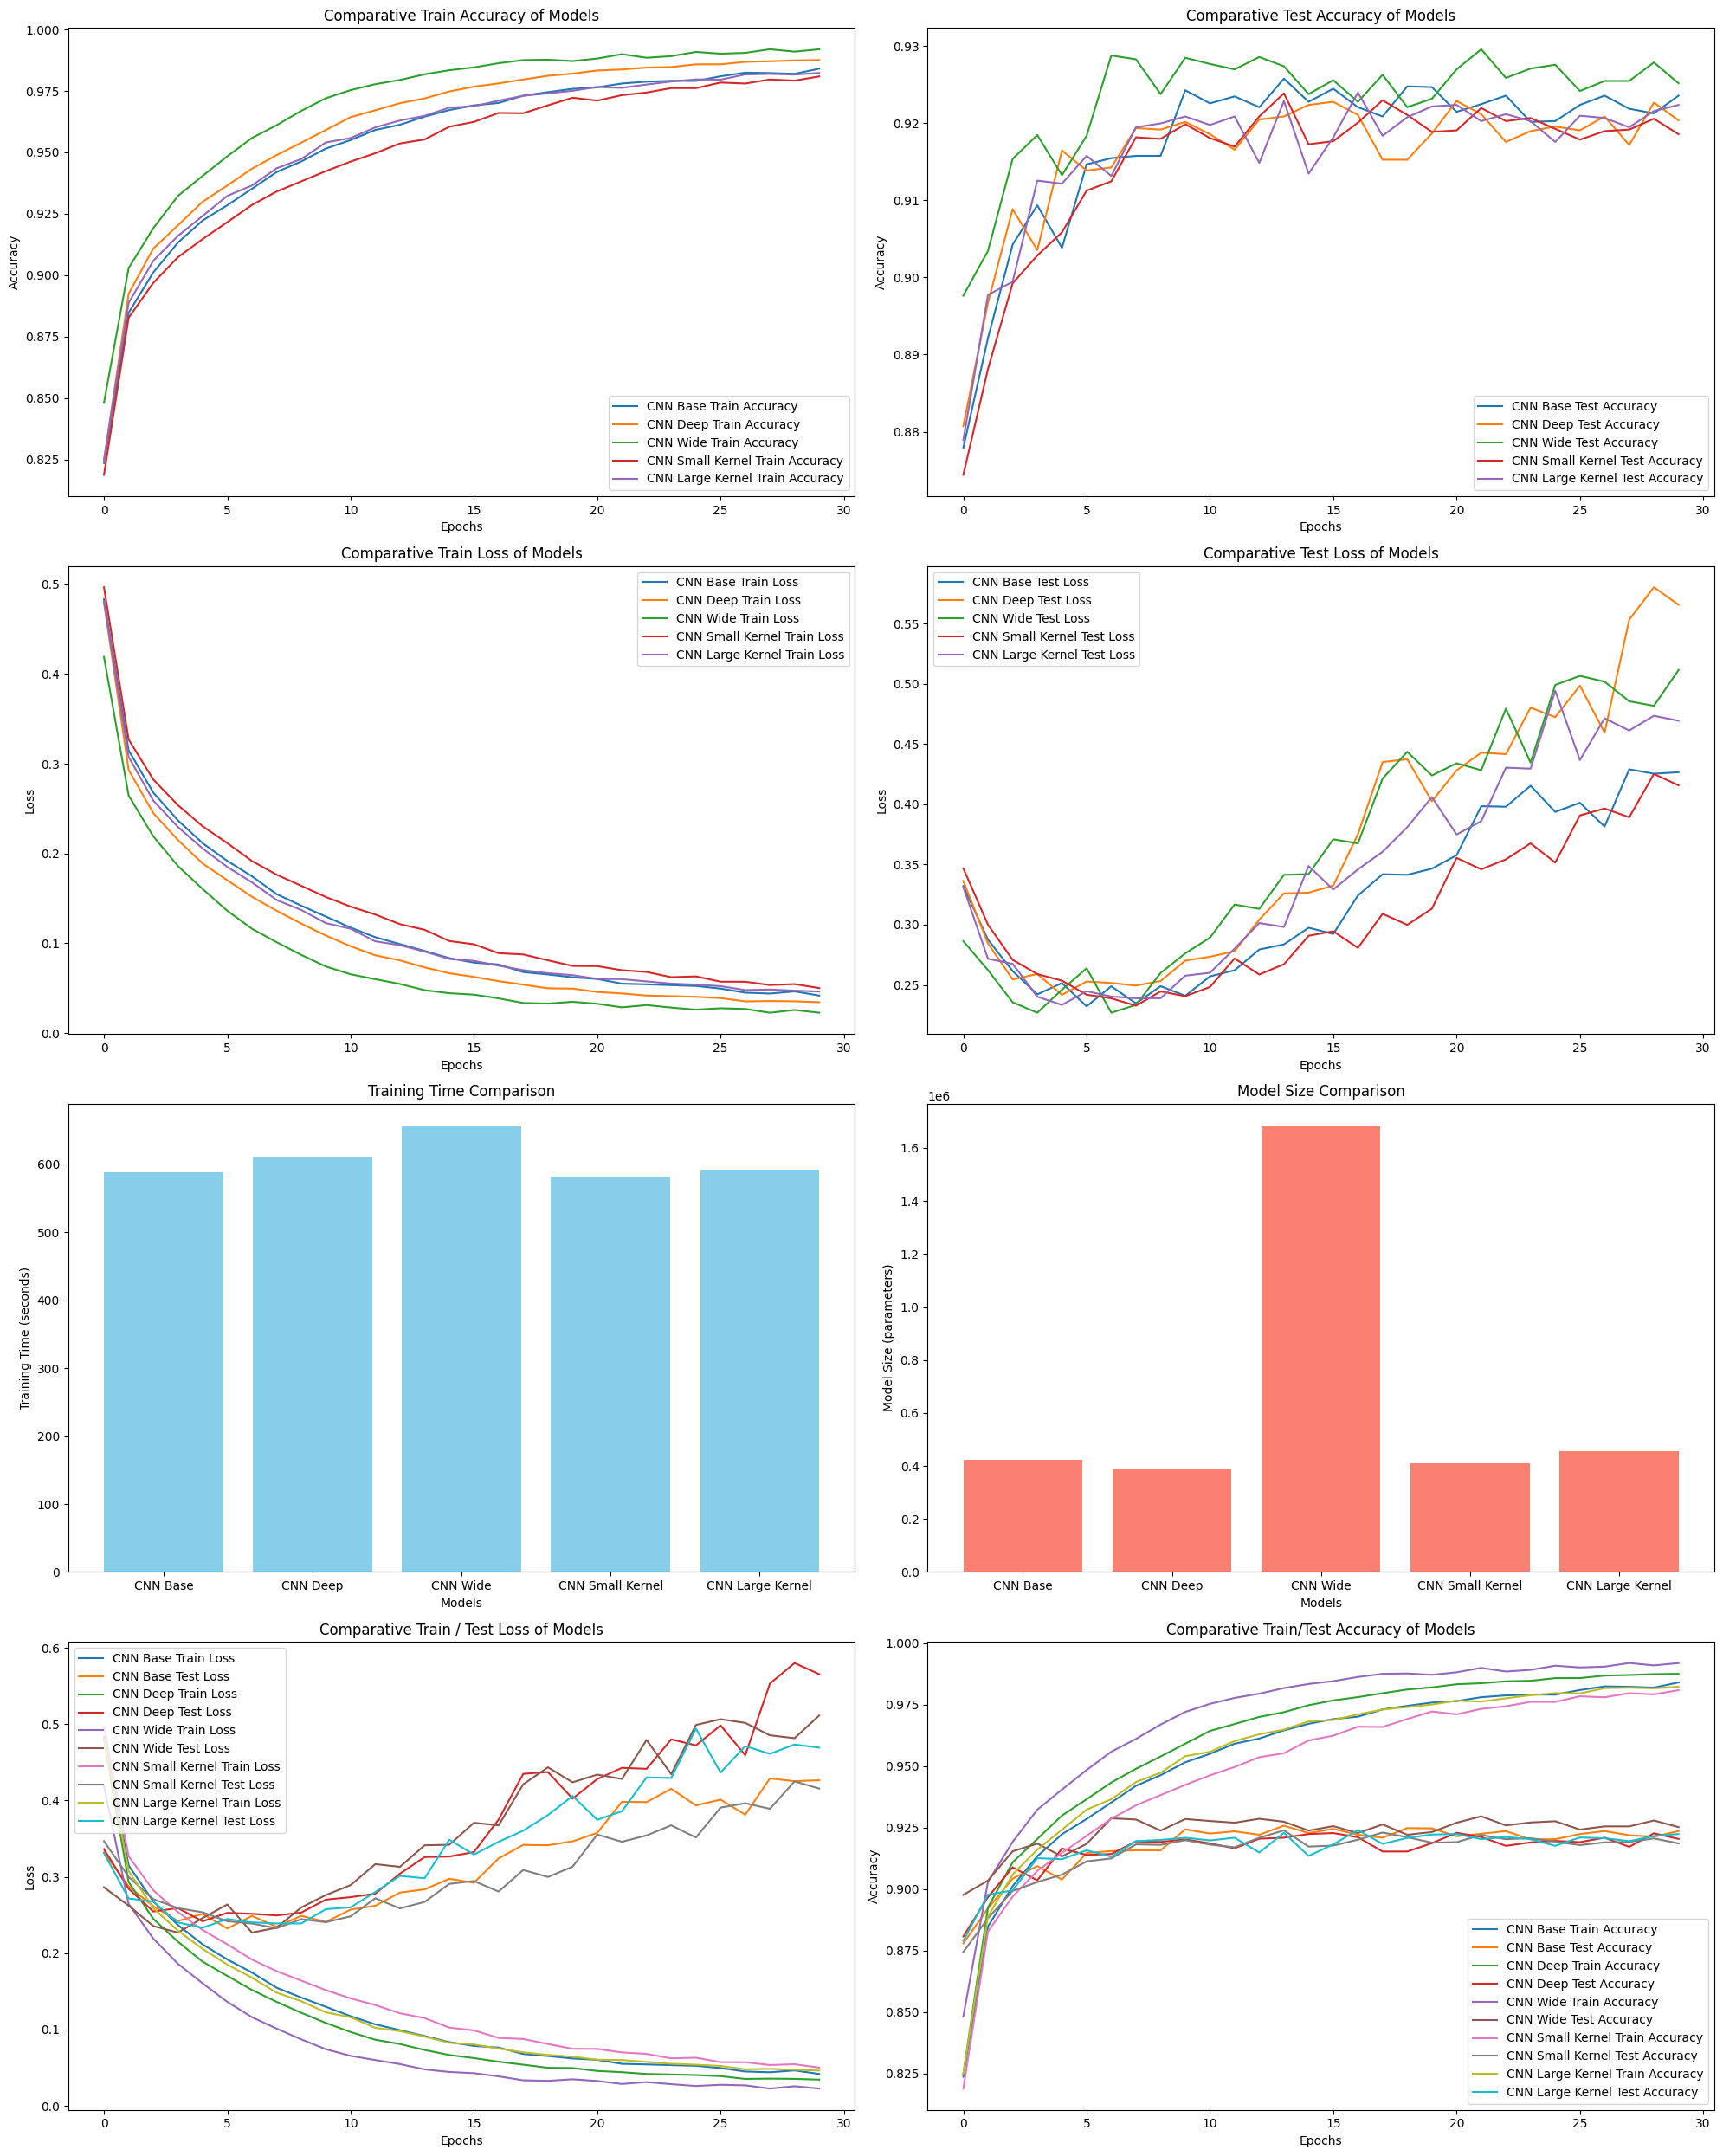

In [16]:
# Mostrar comparaciones
plot_comparisons(model_names, train_accuracies, train_losses, test_accuracies,test_losses, training_times, model_sizes)

Se observa que todos los modelos presentan overfitting luego de la época 5. Son modelos muy complejos que requieren regularización o un entrenamiento más corto. Dado el contexto donde la performance es similar, el modelo seleccionado es CNNSmall  ya que es uno de los más sencillos tine menor cantidad de parámetros y un menor tiempo de entrenamiento.

# Parte 2.b

Empleando el modelo entrenado y elegido por Ud. en el punto anterior **(NO USAR RESNET U OTRO MODELO DISPONIBLE, TIENE QUE USAR EL QUE UD DESARROLLÓ)**, realice transfer learning para procesar las imágenes del dataset MNIST (los números) **e identificar los números mayores o menores a 4,5**.
Para el entrenamiento emplee solamente 20.000 muestras del set de entrenamiento y valide con el set de testeo. Al reducir el train set, mantenga equilibrada la distribución de las clases.

Elija la estrategia de transfer learning acorde a los visto en la teoría y justifique su elección.

Compare las curvas de entrenamiento y accurracy empleando transfer learning o usando la arquitectura elejida en el punto anterior pero entrenando desde cero.
Entregables:
- Estrategia elegida y su justificación.
- Grafica comparativa de función de perdida vs epochs para el modelo con transfer learning y sin transfer learning.
- Grafica comparativa de función de accuracy vs epochs para el modelo con transfer learning y sin transfer learning.
- Comentarios sobre las curvas graficadas.


### Carga de Datos

In [15]:
BATCH_SIZE = 64

# Preparar el dataset MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Cargar MNIST
mnist_train = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

# Ajustar las etiquetas (0 para números < 4.5, 1 para números >= 4.5)
mnist_train.targets = (mnist_train.targets >= 5).long()
mnist_test.targets = (mnist_test.targets >= 5).long()

# Reducir el dataset de entrenamiento a 20,000 muestras equilibradas
train_0 = [i for i, label in enumerate(mnist_train.targets) if label == 0][:10000]
train_1 = [i for i, label in enumerate(mnist_train.targets) if label == 1][:10000]
subset_indices = train_0 + train_1

mnist_train = torch.utils.data.Subset(mnist_train, subset_indices)
train_loader = DataLoader(mnist_train, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=BATCH_SIZE, shuffle=False)

### Transfer Learning

Estrategia Elegida

Dado que el modelo ya está entrenado sobre Fashion MNIST, un dataset similar a MNIST (ambos tienen imágenes en escala de grises y tamaños idénticos de 28x28), la estrategia consiste en
congelar las capas convolucionales del modelo original para preservar las características aprendidas como bordes, texturas y patrones locales que podrían ser útiles también para el dataset MNIST.

Se reentrenar únicamente la parte completamente conectada (fc) para que el modelo aprenda a distinguir entre números menores o mayores a 4.5.


In [19]:
# Configuraciones generales
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

EPOCHS = 30
LEARNING_RATE = 0.001
dropout_=0.3

# Creo modelos con la misma arquitectura
model_scratch = CNNSmall(dropout_)
model_transfer = CNNSmall(dropout_)

#Cargar los pesos del modelo entrenado con Fashion
model_transfer.load_state_dict(torch.load("/content/models/CNNSmall_entrenado.pth"))

# Modificar la última capa para adaptarla a la clasificación binaria
model_transfer.fc2 = nn.Linear(128, 2)  # Cambiar la salida a 2 clases
model_scratch.fc2 = nn.Linear(128, 2)  # Cambiar la salida a 2 clases


# Congelar las capas convolucionales
for param in model_transfer.conv1.parameters():
    param.requires_grad = False
for param in model_transfer.conv2.parameters():
    param.requires_grad = False


model_transfer.to(device)
model_scratch.to(device)

<ipython-input-19-743f1cb0effe>:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_transfer.load_state_dict(torch.load("/content/models/CNNSmall_entrenado.pth"))


CNNSmall(
  (conv1): Conv2d(1, 32, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

### Entrenamiento y evaluación

In [20]:
# Función de entrenamiento con métricas de pérdida y precisión en train/val

def train_model(model, train_loader, val_loader, epochs, learning_rate):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    metrics = {
        "train_loss": [],
        "val_loss": [],
        "train_acc": [],
        "val_acc": []
    }

    for epoch in range(epochs):
        # Entrenamiento
        model.train()
        running_loss = 0.0
        correct_train, total_train = 0, 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Acumular métricas
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = correct_train / total_train
        metrics["train_loss"].append(train_loss)
        metrics["train_acc"].append(train_acc)

        # Evaluación
        model.eval()
        val_loss, correct_val, total_val = 0.0, 0, 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                # Acumular métricas
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        val_loss /= len(val_loader)
        val_acc = correct_val / total_val
        metrics["val_loss"].append(val_loss)
        metrics["val_acc"].append(val_acc)

        # Imprimir métricas por época
        print(f"Epoch {epoch + 1}/{epochs}")
        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
        print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
        print("-" * 30)

    return metrics["train_loss"], metrics["train_acc"], metrics["val_loss"],  metrics["val_acc"]

In [21]:
# Entrenamiento con transferencia
print("Entrenando con transferencia de aprendizaje...")
transfer_train_losses, transfer_train_acc, transfer_val_losses, tansfer_val_acc = train_model(model_transfer, train_loader, test_loader, EPOCHS, LEARNING_RATE)

# Entrenamiento desde cero
print("Entrenando desde cero...")
scratch_train_losses, scratch_train_acc, scratch_val_losses, scratch_val_acc= train_model(model_scratch, train_loader, test_loader, EPOCHS, LEARNING_RATE)

Entrenando con transferencia de aprendizaje...
Epoch 1/30
Train Loss: 0.2093, Train Acc: 0.9157
Val Loss: 0.0879, Val Acc: 0.9680
------------------------------
Epoch 2/30
Train Loss: 0.0806, Train Acc: 0.9712
Val Loss: 0.0605, Val Acc: 0.9767
------------------------------
Epoch 3/30
Train Loss: 0.0529, Train Acc: 0.9817
Val Loss: 0.0602, Val Acc: 0.9774
------------------------------
Epoch 4/30
Train Loss: 0.0395, Train Acc: 0.9869
Val Loss: 0.0601, Val Acc: 0.9798
------------------------------
Epoch 5/30
Train Loss: 0.0306, Train Acc: 0.9898
Val Loss: 0.0528, Val Acc: 0.9810
------------------------------
Epoch 6/30
Train Loss: 0.0237, Train Acc: 0.9922
Val Loss: 0.0516, Val Acc: 0.9821
------------------------------
Epoch 7/30
Train Loss: 0.0197, Train Acc: 0.9933
Val Loss: 0.0450, Val Acc: 0.9845
------------------------------
Epoch 8/30
Train Loss: 0.0173, Train Acc: 0.9940
Val Loss: 0.0454, Val Acc: 0.9849
------------------------------
Epoch 9/30
Train Loss: 0.0139, Train Acc:

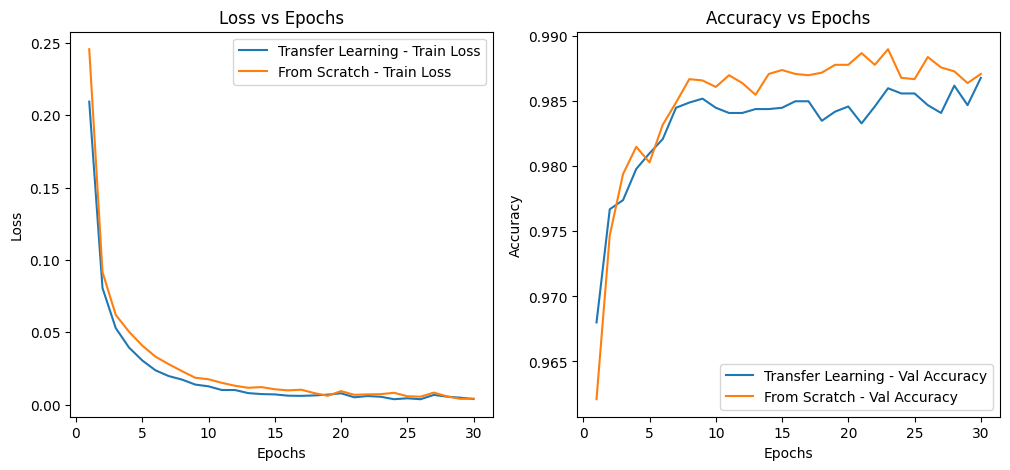

In [22]:
# Pérdida y accuracy vs epochs
epochs = list(range(1, EPOCHS+1))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, transfer_train_losses, label="Transfer Learning - Train Loss")
plt.plot(epochs, scratch_train_losses, label="From Scratch - Train Loss")
plt.legend()
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")


plt.subplot(1, 2, 2)
plt.plot(epochs, tansfer_val_acc, label="Transfer Learning - Val Accuracy")
plt.plot(epochs, scratch_val_acc, label="From Scratch - Val Accuracy")
plt.legend()
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()


Se esperaría que el modelo con transfer learning converja más rápido y tenga mejor generalización debido al aprovechamiento de características preentrenadas.Posiblemente el modelo desde cero tome más tiempo para entrenar y no alcace el mismo desempeño con solo 20,000 muestras. No obstante del análisis de las curvas no se desprende lo esperado.